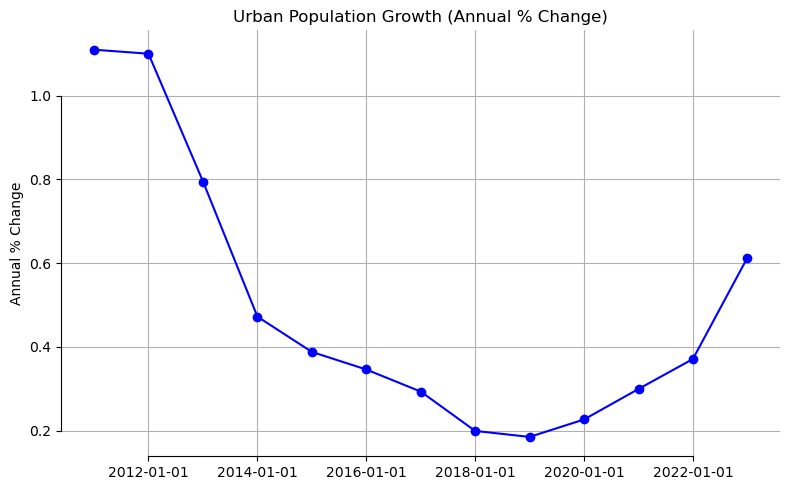

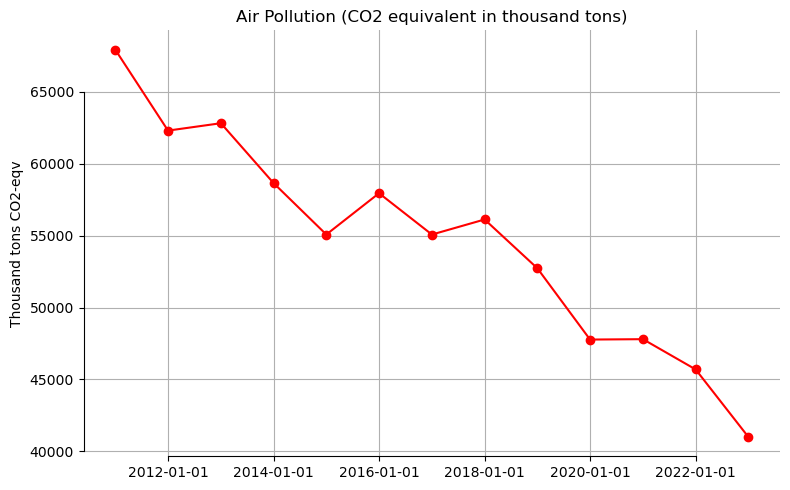

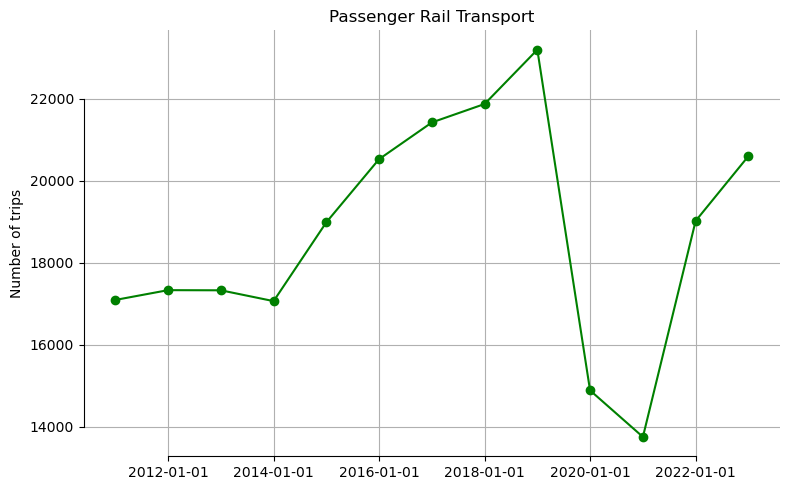

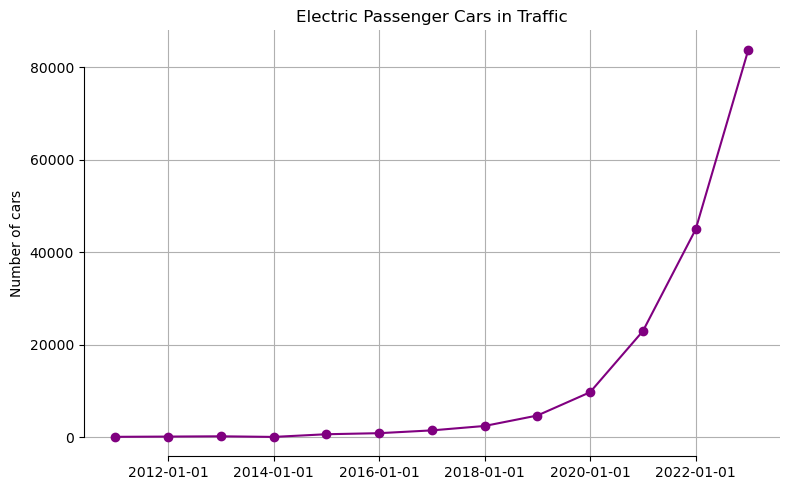

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Yearly Pollution
df_pollution = pd.read_csv("/home/akupalo/informationviz/data/001_138v_2023_20250312-162058.csv")
df_pollution['Vuosi'] = pd.to_datetime(df_pollution['Vuosi'], format='%Y')
df_pollution.set_index('Vuosi', inplace=True)

# Urban Population Growth
df_growth = pd.read_csv("/home/akupalo/informationviz/data/finland-urban-population.csv")
df_growth.columns = df_growth.columns.str.strip()
df_growth['Year'] = pd.to_datetime(df_growth['Year'], format='%Y')
df_growth.set_index('Year', inplace=True)

# Railway Trips
df_rail = pd.read_csv("/home/akupalo/informationviz/data/statfin_rtie_pxt_12ra_20250313_122818.csv")
df_rail.columns = df_rail.columns.str.strip()
df_rail['Year'] = df_rail['Year'].str.extract(r'(\d{4})').astype(int)
df_rail = df_rail.groupby('Year').mean()
df_rail.index = pd.to_datetime(df_rail.index, format='%Y')

# Electric Cars
df_car = pd.read_csv("/home/akupalo/informationviz/data/statfin_mkan_pxt_11ie_20250313_122422.csv")
df_car.columns = df_car.columns.str.strip()
df_car['year'] = pd.to_datetime(df_car['year'], format='%Y', errors='coerce')
df_car.set_index('year', inplace=True)

start_year = "2011"
end_year = "2023"

df_growth = df_growth.loc[start_year:end_year]
df_pollution = df_pollution.loc[start_year:end_year]
df_rail = df_rail.loc[start_year:end_year]
df_car = df_car.loc[start_year:end_year]

# Prepare for visualization
data = pd.DataFrame({
    'Urban Population Growth': df_growth["Annual % Change"],
    'Air Pollution': df_pollution["Paasto tuhatta tonnia CO2-ekv. (GWP=AR5)"],
    'Number of railway trips': df_rail["Passenger rail transport"],
    'Number of electric cars': df_car["Number of electric passenger cars in traffic"]
})

# Drop missing values to avoid visualization errors
data.dropna(inplace=True)

# Urban Population Growth
plt.figure(figsize=(8, 5))
plt.plot(data.index, data['Urban Population Growth'], marker='o', color='blue')
plt.title('Urban Population Growth (Annual % Change)')
plt.ylabel('Annual % Change')
sns.despine(trim=True)
plt.tight_layout()
plt.grid(True)
plt.show()

# Air Pollution
plt.figure(figsize=(8, 5))
plt.plot(data.index, data['Air Pollution'], marker='o', color='red')
plt.title('Air Pollution (CO2 equivalent in thousand tons)')
plt.ylabel('Thousand tons CO2-eqv')
sns.despine(trim=True)
plt.tight_layout()
plt.grid(True)
plt.show()

# Number of railway trips
plt.figure(figsize=(8, 5))
plt.plot(data.index, data['Number of railway trips'], marker='o', color='green')
plt.title('Passenger Rail Transport')
plt.ylabel('Number of trips')
sns.despine(trim=True)
plt.tight_layout()
plt.grid(True)
plt.show()

# Number of electric cars
plt.figure(figsize=(8, 5))
plt.plot(data.index, data['Number of electric cars'], marker='o', color='purple')
plt.title('Electric Passenger Cars in Traffic')
plt.ylabel('Number of cars')
sns.despine(trim=True)
plt.tight_layout()
plt.grid(True)
plt.show()

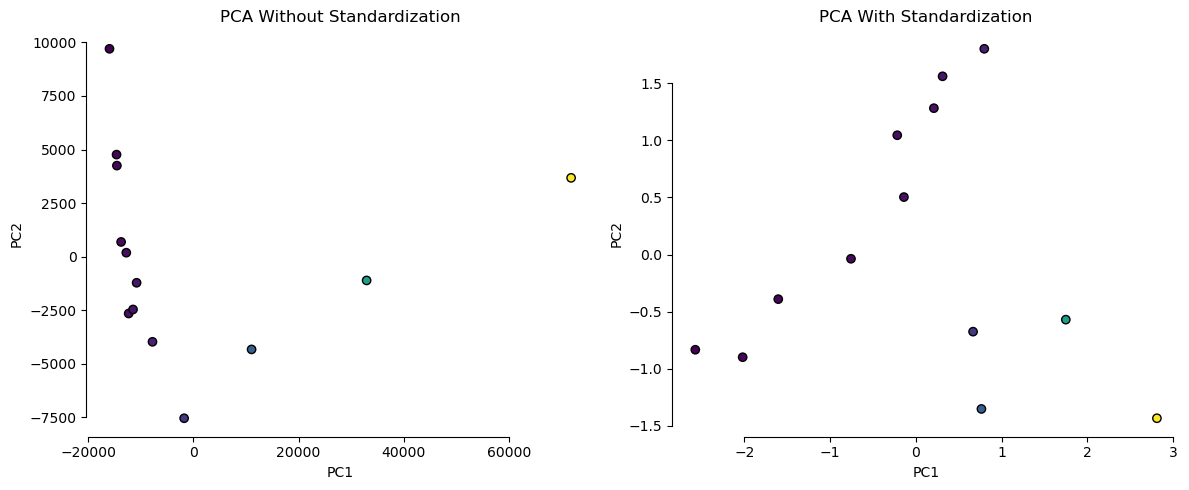

/home/akupalo/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/akupalo/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


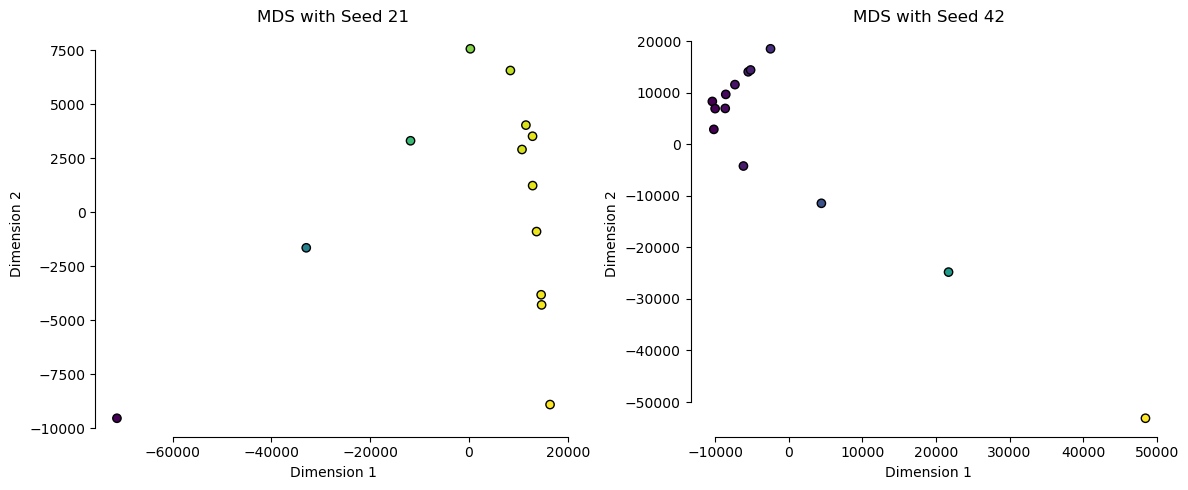

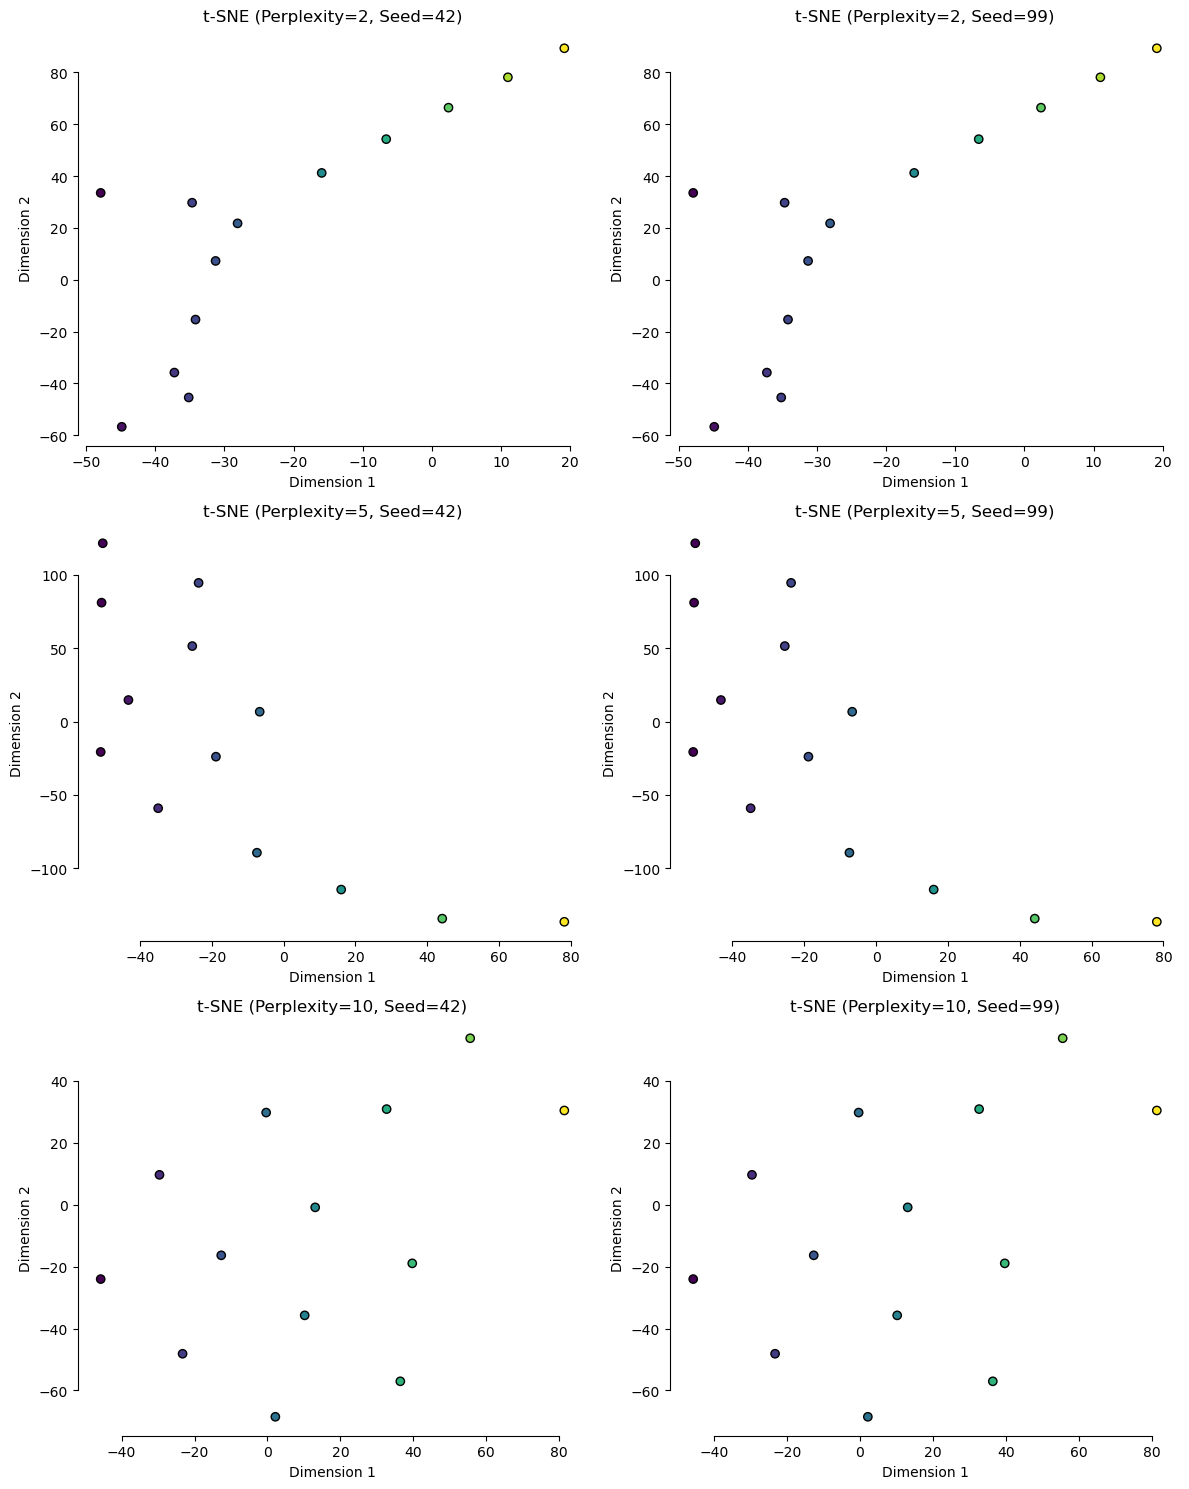

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler

### 1. PCA - With and Without Standardization
# Without standardization
pca_raw = PCA(n_components=2)
pca_raw_results = pca_raw.fit_transform(data)

# With standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca_scaled = PCA(n_components=2)
pca_scaled_results = pca_scaled.fit_transform(data_scaled)

# Plot PCA results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(pca_raw_results[:, 0], pca_raw_results[:, 1], c=pca_raw_results[:, 0], cmap='viridis', edgecolors='k')
axes[0].set_title("PCA Without Standardization")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

axes[1].scatter(pca_scaled_results[:, 0], pca_scaled_results[:, 1], c=pca_raw_results[:, 0], cmap='viridis', edgecolors='k')
axes[1].set_title("PCA With Standardization")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

sns.despine(trim=True)
plt.tight_layout()
plt.show()

### 2. MDS with Two Different Random Seeds
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, seed in enumerate([21, 42]):
    mds = MDS(n_components=2, random_state=seed)
    mds_results = mds.fit_transform(data)
    
    axes[i].scatter(mds_results[:, 0], mds_results[:, 1], c=mds_results[:, 0], cmap='viridis', edgecolors='k')
    axes[i].set_title(f"MDS with Seed {seed}")
    axes[i].set_xlabel("Dimension 1")
    axes[i].set_ylabel("Dimension 2")

sns.despine(trim=True)
plt.tight_layout()
plt.show()

### 3. t-SNE with Three Perplexities (5, 30, 50) and Two Seeds Each
perplexities = [2, 5, 10]
seeds = [42, 99]

fig, axes = plt.subplots(3, 2, figsize=(12, 15))

for i, perplexity in enumerate(perplexities):
    for j, seed in enumerate(seeds):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=seed)
        tsne_results = tsne.fit_transform(data)

        ax = axes[i, j]
        ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=tsne_results[:, 0], cmap='viridis', edgecolors='k')
        ax.set_title(f"t-SNE (Perplexity={perplexity}, Seed={seed})")
        ax.set_xlabel("Dimension 1")
        ax.set_ylabel("Dimension 2")

sns.despine(trim=True)
plt.tight_layout()
plt.show()